In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

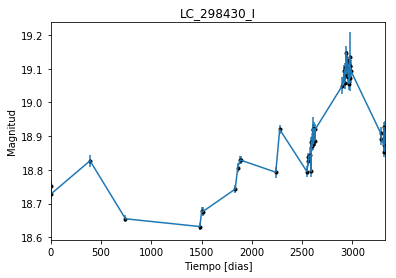

In [2]:
data = np.genfromtxt('LC_298430_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_298430_I')
plt.savefig("LC_298430_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

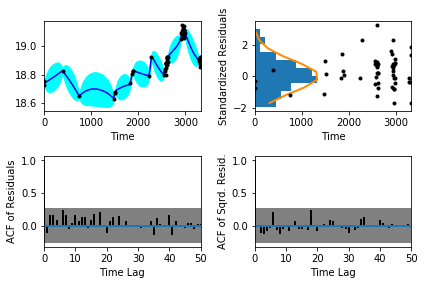

In [5]:
sample.assess_fit()

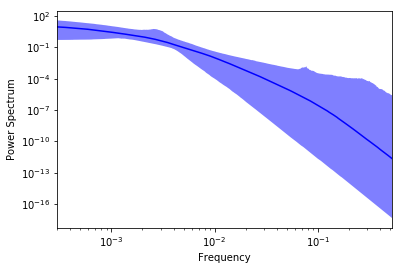

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

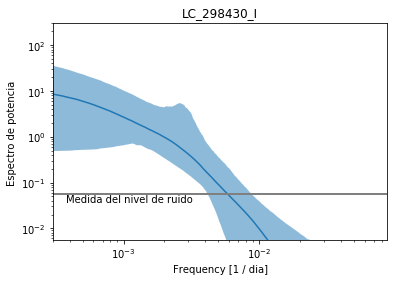

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_298430_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_298430_I')

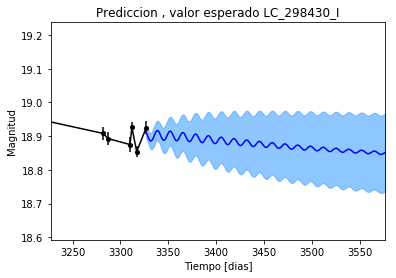

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_298430_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_298430_I')

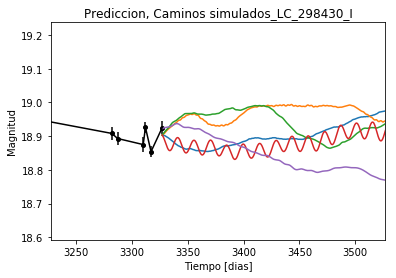

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_298430_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


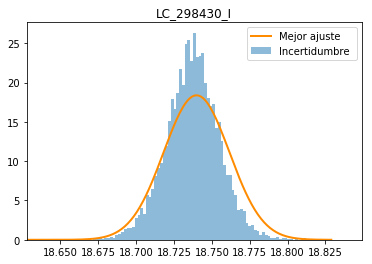

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_298430_I')
plt.savefig("Mejor_ajuste_LC_297623_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_297623_I')

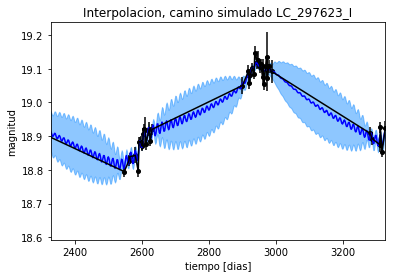

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_I')

Text(0.5,1,'Interpolacion, camino simulado LC_297623_I')

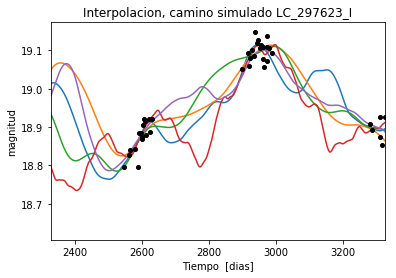

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_I')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1359.32664962
Median: 0.00709532976236
Standard deviation: 0.173233294194
68% credibility interval: [ 0.00074087  0.12876128]
95% credibility interval: [  3.57820273e-04   6.88388202e-01]
99% credibility interval: [  3.06232520e-04   9.57143225e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 667.9189695
Median: 0.00179237219901
Standard deviation: 0.0626051183561
68% credibility interval: [ 0.00048448  0.01679492]
95% credibility interval: [ 0.00032688  0.17100359]
99% credibility interval: [  3.03569500e-04   4.37250860e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 613.791950461
Median: 0.0444172037641
Standard d

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1521.48512847
Median: 119.202722678
Standard deviation: 1.81316369666
68% credibility interval: [ 117.359946    120.48553075]
95% credibility interval: [ 114.83953406  122.4151536 ]
99% credibility interval: [ 112.6445481   122.99291669]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 653.684340208
Median: 0.845353978004
Standard deviation: 2.10693799676
68% credibility interval: [ 0.08281987  3.96862845]
95% credibility interval: [ 0.02068295  6.95016244]
99% credibility interval: [ 0.01366916  9.70535795]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 699.910091398
Median: 0.304581493398
Standard deviation: 6.67306091137
68% credibility interval: [ 0.01532942  4.36779799]
95% credibility interval: [  7.29064514e-0

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10542.445776
Median: 7.56295040626e-30
Standard deviation: 1.52911885786e+59
68% credibility interval: [  2.63471287e-65   9.08101927e-07]
95% credibility interval: [  1.04437204e-93   4.24144009e+33]
99% credibility interval: [  4.05908008e-101   3.88894840e+050]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2859.04322274
Median: 18.8119264209
Standard deviation: 0.0664633765143
68% credibility interval: [ 18.75073373  18.8670457 ]
95% credibility interval: [ 18.66865746  18.93569265]
99% credibility interval: [ 18.5919617   19.00051671]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 380.546868715
Median: 0.00321059689129
Standard deviation: 0.192013530015
68% credibility interval: [ 0.          0.21860211]
95% credibility interval: [ 0.        0.740009]
99% credibility interval: [ 0.          0.93454344]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 380.546868715
Median: 0.00321059689129
Standard deviation: 0.192013530015
68% credibility interval: [ 0.          0.21860211]
95% credibility interval: [ 0.        0.740009]
99% credibility interval: [ 0.          0.93454344]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 253.752461415
Median: 0.0
Standard deviation: 0.000614260613567
68% credibil

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1521.48512847
Median: 119.202722678
Standard deviation: 1.81316369666
68% credibility interval: [ 117.359946    120.48553075]
95% credibility interval: [ 114.83953406  122.4151536 ]
99% credibility interval: [ 112.6445481   122.99291669]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1194.60911804
Median: 0.0206247886954
Standard deviation: 0.0179050575991
68% credibility interval: [ 0.0132927   0.03511852]
95% credibility interval: [ 0.00911266  0.06773329]
99% credibility interval: [ 0.00759975  0.10989397]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 515.629524377
Median: 1.27687774018
Standard deviation: 0.226762970711
68% credibility interval: [ 1.06542878  1.51003496]
95% credibility interval: [ 0.85895834  1.77826095]
99% credibility interval: [ 0.74853616  1.90898687]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 290.81971201
Median: 0.000141857344951
Standard deviation: 0.0676956913174
68% credibility interval: [  3.39057160e-06   4.45464159e-03]
95% credibility interval: [  6.21335938e-38   1.56738990e-01]
99% credibility interval: [  7.15863911e-55   4.48836053e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1359.32664962
Median: (-0.0445812717124-0.00653546596023j)
Standard deviation: 1.6248925822
68% credibility interval: [-0.80903096+0.j         -0.00465502-0.42747285j]
95% credibility interval: [ -4.32527064e+00+0.j          -2.24825108e-03-0.02052543j]
99% credibility interval: [ -6.01390825e+00+0.j         -1.92411567e-03-0.4698028j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 667.9189695
Median: (-0.0112618066658+9.80333071386e-05j)
Standard deviation: 1.26896384827
68% credibility interval: [-0.10552557+3.99102161j -0.00304410+0.01953067j]
95% credibility interval: [-1.07444723+3.58764107j -0.00205387+0.01611751j]
99% credibility interval: [ -2.74732818e+00+4.78806075j  -1.90738342e-03+0.j        ]
Posterior su